# load package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
from scipy.spatial import cKDTree
import astropy.units as u
import pandas as pd

In [3]:
np.std?

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 

In [3]:
import scipy

# VIPERS

In [3]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'FUV_OBS','NUV_OBS','u_OBS','g_OBS','r_OBS','i_OBS','iy_OBS','z_OBS','Ks_OBS','K_OBS','hsc_g_OBS','hsc_r_OBS','hsc_i_OBS','hsc_z_OBS','hsc_y_OBS',\
            'ERR_FUV_OBS','ERR_NUV_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_iy_OBS','ERR_z_OBS','ERR_Ks_OBS','ERR_K_OBS','ERR_hsc_g_OBS','ERR_hsc_r_OBS','ERR_hsc_i_OBS','ERR_hsc_z_OBS','ERR_hsc_y_OBS', \
            'FUV_MOD','NUV_MOD','u_MOD','g_MOD','r_MOD','i_MOD','iy_MOD','z_MOD','Ks_MOD','K_MOD','hsc_g_MOD','hsc_r_MOD','hsc_i_MOD','hsc_z_MOD','hsc_y_MOD', \
            'CONTEXT','ZSPEC','RA','DEC','ZFLAG','TSR','SSR','PHOTOMask','CLASSFLAG', 'DeltaUG', 'DeltaGR', 'DeltaRI', \
            'FUV_ABS','NUV_ABS','u_ABS','g_ABS','r_ABS','i_ABS','iy_ABS','z_ABS','Ks_ABS','K_ABS','hsc_g_ABS','hsc_r_ABS','hsc_i_ABS','hsc_z_ABS','hsc_y_ABS','Z_MAX']

W1 = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VIPERS/zy_VIPERS_w1_T0005.out',sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [4]:

SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'FUV_OBS','NUV_OBS','u_OBS','g_OBS','r_OBS','i_OBS','iy_OBS','z_OBS','Ks_OBS','K_OBS','hsc_g_OBS','hsc_r_OBS','hsc_i_OBS','hsc_z_OBS','hsc_y_OBS',\
            'ERR_FUV_OBS','ERR_NUV_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_iy_OBS','ERR_z_OBS','ERR_Ks_OBS','ERR_K_OBS','ERR_hsc_g_OBS','ERR_hsc_r_OBS','ERR_hsc_i_OBS','ERR_hsc_z_OBS','ERR_hsc_y_OBS', \
            'FUV_MOD','NUV_MOD','u_MOD','g_MOD','r_MOD','i_MOD','iy_MOD','z_MOD','Ks_MOD','K_MOD','hsc_g_MOD','hsc_r_MOD','hsc_i_MOD','hsc_z_MOD','hsc_y_MOD', \
            'CONTEXT','ZSPEC','RA','DEC','ZFLAG','TSR','SSR','PHOTOMask','CLASSFLAG', 'DeltaUG', 'DeltaGR', 'DeltaRI', \
            'FUV_ABS','NUV_ABS','u_ABS','g_ABS','r_ABS','i_ABS','iy_ABS','z_ABS','Ks_ABS','K_ABS','hsc_g_ABS','hsc_r_ABS','hsc_i_ABS','hsc_z_ABS','hsc_y_ABS','Z_MAX']

W4 = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VIPERS/zy_VIPERS_w4_T0005.out',sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [5]:
g = np.hstack([W1['g_OBS'],W4['g_OBS']])
z = np.hstack([W1['z_OBS'],W4['z_OBS']])
i = np.hstack([W1['i_OBS'],W4['i_OBS']])
mass = np.hstack([W1['MASS_BEST'],W4['MASS_BEST']])
redshift = np.hstack([W1['ZSPEC'],W4['ZSPEC']])
zmax = np.hstack([W1['Z_MAX'],W4['Z_MAX']])
tsr = np.hstack([W1['TSR'],W4['TSR']])
ssr = np.hstack([W1['SSR'],W4['SSR']])
zflag = np.hstack([W1['ZFLAG'],W4['ZFLAG']])

In [7]:
zflag.shape

(31122,)

In [6]:
g_z = g-z
index = ((z>0)&(zflag>2)&(zflag<11)&(redshift>=0.5)&(redshift<=0.7))
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]
zflag = zflag[index]

In [11]:
z.shape

(31122,)

In [13]:
np.unique(g_z)

array([-5.146, -2.909, -2.888, ...,  4.281,  4.374,  4.477])

In [47]:
zflag.shape

(31122,)

In [8]:
np.unique(zmax)

array([0.46884 , 0.51    , 0.510431, ..., 1.70244 , 1.767   , 2.      ])

In [7]:
index = ((tsr>0)&(ssr>0))
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]
zflag = zflag[index]

index = (zmax>0.5)
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]
zflag = zflag[index]
zmax[(zmax>0.7)]=0.7


In [49]:
zflag.shape

(31108,)

In [8]:
V_0 = []
for index in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[index]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)

Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
Vtotal
weight0 = Vtotal.value/V_1

weight1 = 1/ssr * 1/tsr * weight0

(7.0, 12.0)

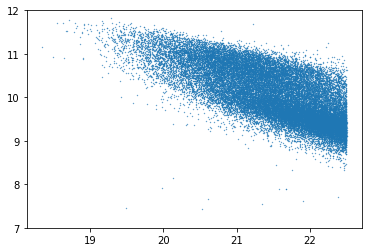

In [18]:
plt.scatter(i,mass,s =0.1)
plt.ylim(7,12)

In [11]:
np.unique(i)

array([18.346, 18.494, 18.553, ..., 22.498, 22.499, 22.5  ])

In [19]:
g_z_VIPERS = g_z[g_z>2]

In [20]:
g_z_VIPERS

array([2.074, 2.754, 2.486, ..., 2.597, 2.95 , 3.148])

In [9]:
test = np.vstack((i,z,g_z,redshift,weight1))
test = test.T

In [13]:
test.shape

(31108, 5)

In [15]:
temp.shape

(5, 8674)

In [18]:
temp[0]

array([22.472, 22.405, 22.133, ..., 22.175, 22.029, 22.268])

In [26]:
ibins = np.array([20,20.5,21,21.5,22,22.5])
frac_noweight = np.zeros(5)
err_noweight = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp[0]),size = len(temp[0]),replace = True)
        g_z_temp = temp[2][index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac_noweight[j] = np.mean(frac_each)
    err_noweight[j] = np.std(frac_each,ddof=1)
    

In [31]:
ibins = np.array([20,20.5,21,21.5,22,22.5])
frac_weight = np.zeros(5)
err_weight = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp[0]),size = len(temp[0]),replace = True)
        g_z_temp = temp[2][index_temp]
        frac_each[k] = np.sum(temp[-1][index_temp][g_z_temp>2])/np.sum(temp[-1][index_temp])
    frac_weight[j] = np.mean(frac_each)
    err_weight[j] = np.std(frac_each,ddof =1)
    

In [11]:
ibins = np.array([20,20.5,21,21.5,22,22.5])
frac = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    frac[j] = np.sum(temp[-1][temp[2]>2])/np.sum(temp[-1])
    

In [27]:
frac_noweight

array([0.66666134, 0.58417891, 0.46934907, 0.33644764, 0.19721107])

In [23]:
frac_noweight

array([0.66666134, 0.58417891, 0.46934907, 0.33644764, 0.19721107])

In [30]:
frac_weight

array([0.66555355, 0.57535585, 0.46945998, 0.36189745, 0.20743706])

In [32]:
frac_weight

array([0.66555355, 0.57535585, 0.46945998, 0.36189745, 0.20743706])

In [34]:
err_weight

array([0.01115256, 0.00787066, 0.00682245, 0.00610394, 0.00685161])

In [33]:
err_weight

array([0.0110063 , 0.00797829, 0.00670611, 0.00616625, 0.00690246])

In [37]:
plt.errorbar?

Signature:
plt.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : float or array-like
    The data positions.

xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2, N): Separate - and + values for each bar. First row
      contains the lower errors, the second row contains the

(0.0, 1.0)

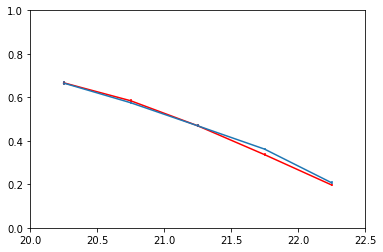

In [39]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
plt.errorbar(ibin0,frac_noweight,err_noweight,color ='red')
plt.errorbar(ibin0,frac_weight,err_weight)


plt.xlim(20,22.5)
plt.ylim(0,1)

(0.0, 1.0)

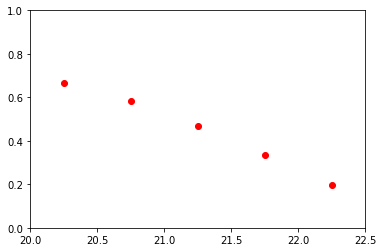

In [22]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
plt.scatter(ibin0,frac_noweight,color ='red')
# plt.scatter(ibin0,frac)


plt.xlim(20,22.5)
plt.ylim(0,1)

In [25]:
index = ((i>20)&(i<20.5))
temp = test[index]
temp.shape

(2279, 5)

In [26]:
temp = temp.T
frac = np.sum(temp[-1][temp[2]>2])/np.sum(temp[-1])
frac

0.6658278365949948

In [15]:
np.max(temp.T[2])

4.477

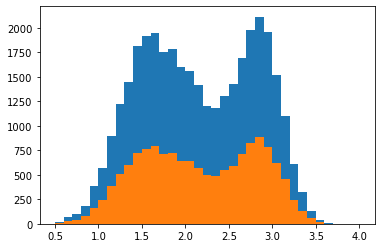

In [66]:
a = plt.hist(temp.T[2],range=[0.5,4],bins = 35,weights = temp.T[-1])
b = plt.hist(temp.T[2],range=[0.5,4],bins = 35)

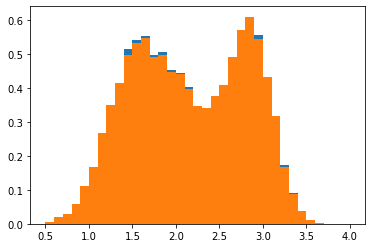

In [54]:
a = plt.hist(temp.T[2],range=[0.5,4],bins = 35,weights = temp.T[-1],density = True)
b = plt.hist(temp.T[2],range=[0.5,4],bins = 35,density = True)

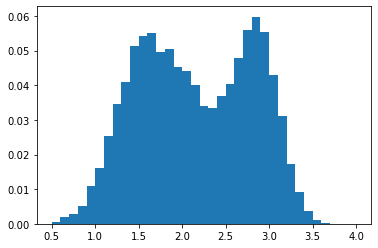

In [62]:
a = plt.hist(temp.T[2],range=[0.5,4],bins = 35,weights = temp.T[-1]/sum(temp.T[-1]))
# b = plt.hist(temp.T[2],range=[0.5,4],bins = 35,density = True)

In [65]:
np.sum(a[0])

0.9983588589820056

In [57]:
a[0]*0.1

array([6.30137674e-04, 2.08414134e-03, 2.74481398e-03, 5.17596198e-03,
       1.09978629e-02, 1.60278175e-02, 2.54519089e-02, 3.47219869e-02,
       4.10463404e-02, 5.13719034e-02, 5.41827987e-02, 5.53184747e-02,
       4.95706244e-02, 5.06042966e-02, 4.52520707e-02, 4.42857007e-02,
       4.02303808e-02, 3.41662325e-02, 3.35876161e-02, 3.68615179e-02,
       4.04449227e-02, 4.80090768e-02, 5.60042461e-02, 5.98891440e-02,
       5.55005041e-02, 4.30621198e-02, 3.11943257e-02, 1.73943969e-02,
       9.11723218e-03, 3.83242326e-03, 1.04987224e-03, 1.20083646e-04,
       6.90645138e-05, 0.00000000e+00, 0.00000000e+00])

In [49]:
np.sum(a[0]*0.1)

1.0000000000000002

In [67]:
a[0]

array([  22.25884211,   73.61974206,   96.95719425,  182.83452198,
        388.48604733,  566.16303601,  899.05752991, 1226.51168855,
       1449.91173701, 1814.6496117 , 1913.94104881, 1954.05741294,
       1751.02163463, 1787.5348424 , 1598.47401272, 1564.33817441,
       1421.08896336, 1206.88034746, 1186.44142909, 1302.0880034 ,
       1428.66739193, 1695.86187914, 1978.28144662, 2115.51071339,
       1960.48737711, 1521.11667616, 1101.90137687,  614.43578141,
        322.05506783,  135.37566107,   37.08545198,    4.24180783,
          2.43961942,    0.        ,    0.        ])